# Deep Learning-III
## 12/3/2024

<a href="?print-pdf">print view</a>

<a href="./Lecture23-DeepLearning-III.ipynb">notebook</a>

# Project Groups

- ## Group 1: Aidan Matunis, Brent Schlegel, Nishtha Trivedi (December 5)
- ## Group 2: Dhiraj Veedu, Gavin Treadway, Omer Bashir (December 5)
- ## Group 3: Courtney Charlseworth, Elizabeth Gilfeather, Jennifer Rakowski (December 5)
- ## Group 4: Blake D, David Antolick, Jacob Antonello (December 5)
- ## Group 5: Eeshrita Jog, Jason Yeung, Tianyuzhou Liang (December 10)
- ## Group 6: Dmytro Klitchyk, Gouthamrajan Nadarajan (December 10)
- ## Group 7: Yao Wang, Kexin Sun (December 10)
- ## Group 8: Jessie Weng and Yirun Chen (December 10)
- ## Group 9: Murray White (December 10)


# Project presentations

##  Present a biology/medicine themed paper that incorporates 'substantial' python implementation. 

### Dates: December 5 and December 10

**Papers can be from diverse areas of computational biology and medicine including but not limited to: systems biology, bioinformatics, computational structural biology, computational medicine, evolution, bioimaging, etc.**

**Details** 
1. You can work in groups of no more than 3 people.
2. All three group members will be required to present.
3. The presentation should be 12 mins + 3 mins questions.
4. The presentation should include:
    - What the paper is about.
    - A clear description of the python based coding done in the paper (including any packages you found interesting).
    - How that work helped the authors achieve the results they presented in the paper

# OMET Teaching Survey

Please fill out.

# Convolutional Layers

For images, each pixel is an input feature.  Each hidden layer is a set of feature maps.

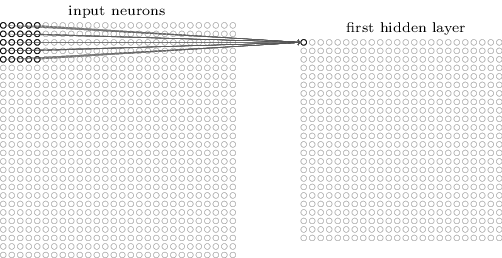


# Pooling

Pooling layers apply a fixed convolution (usually the non-linear MAX kernel).  The kernel is usually applied with a *stride* to reduce the size of the layer.
 * faster to train
 * fewer parameters to fit
 * less sensitive to small changes (MAX)

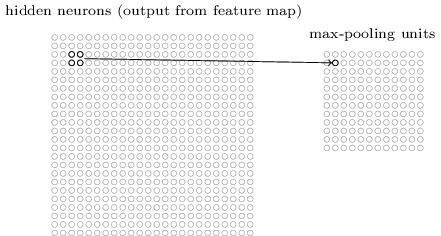


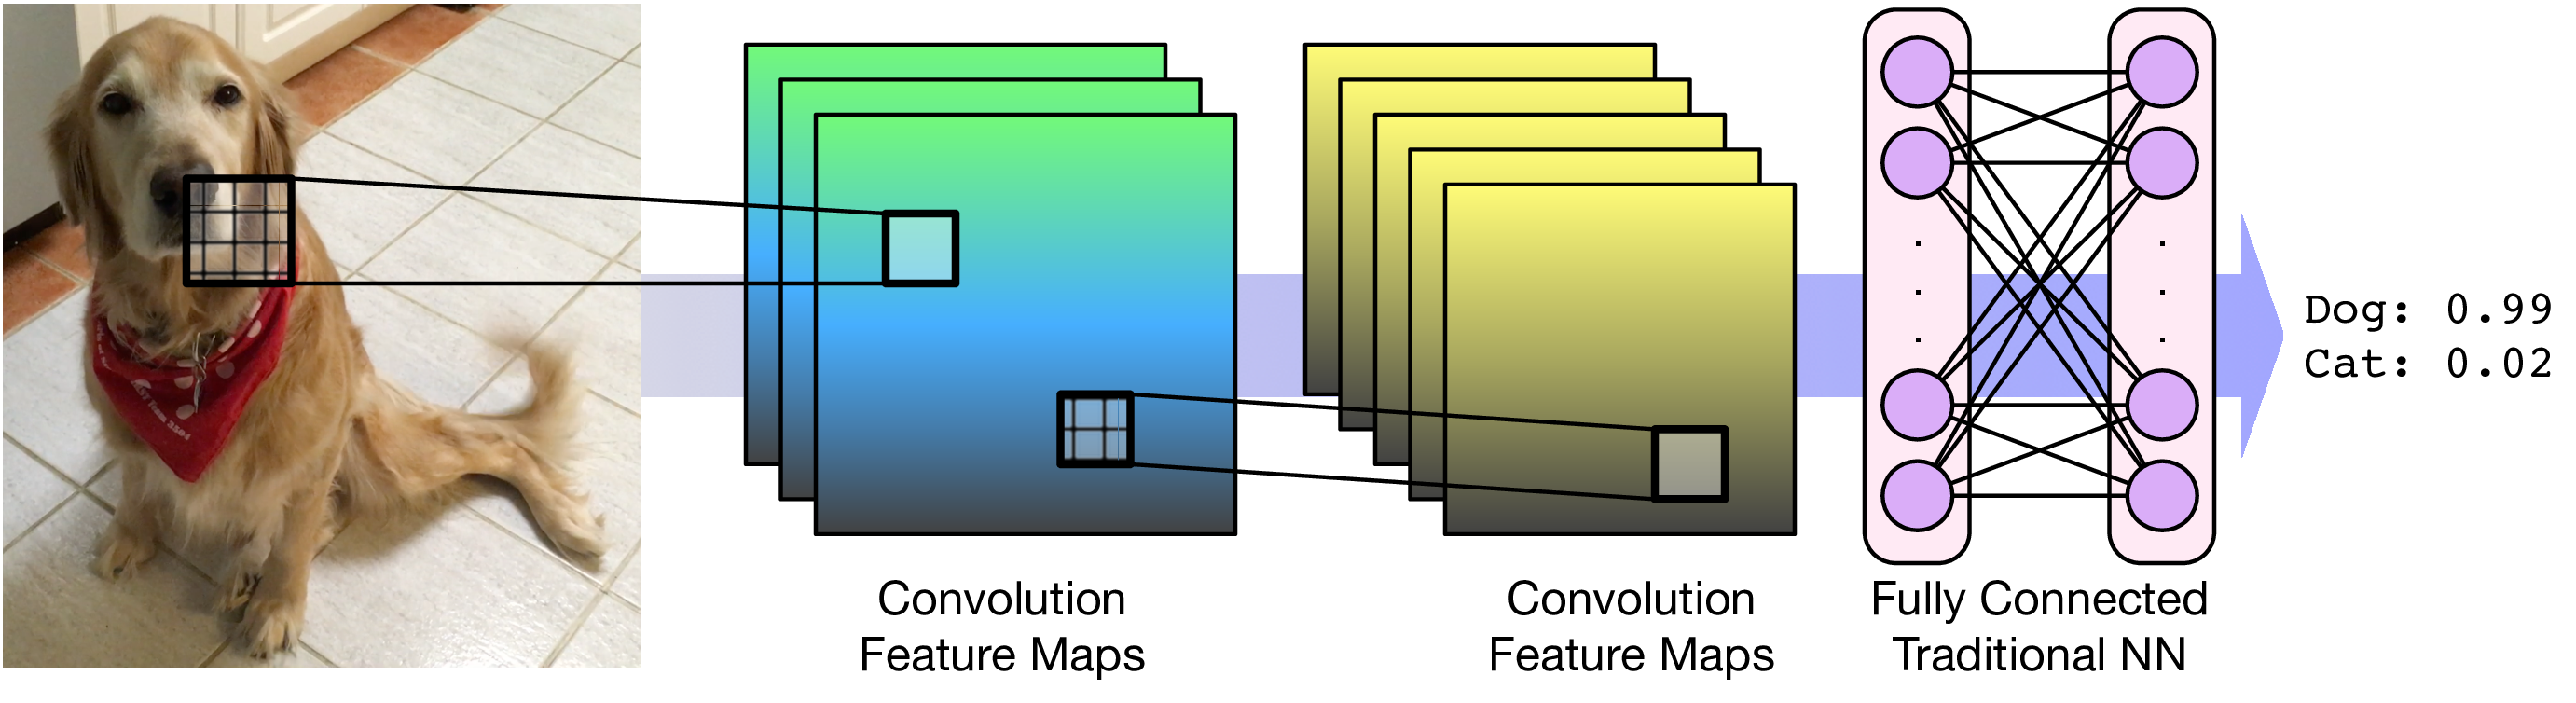

The last features maps are typically connected to one or more fully-connected layers to produce the desired output.

Consider an input image with 100 pixels.  In a classic neural network, we hook these pixels up to a hidden layer with 10 nodes.  In a CNN, we hook these pixels up to a convolutional layer with a 3x3 kernel and 10 output feature maps.

### Question: "Which network has more parameters to learn?",
- Classic
- CNN

## Let us CNN to classify cats and dogs

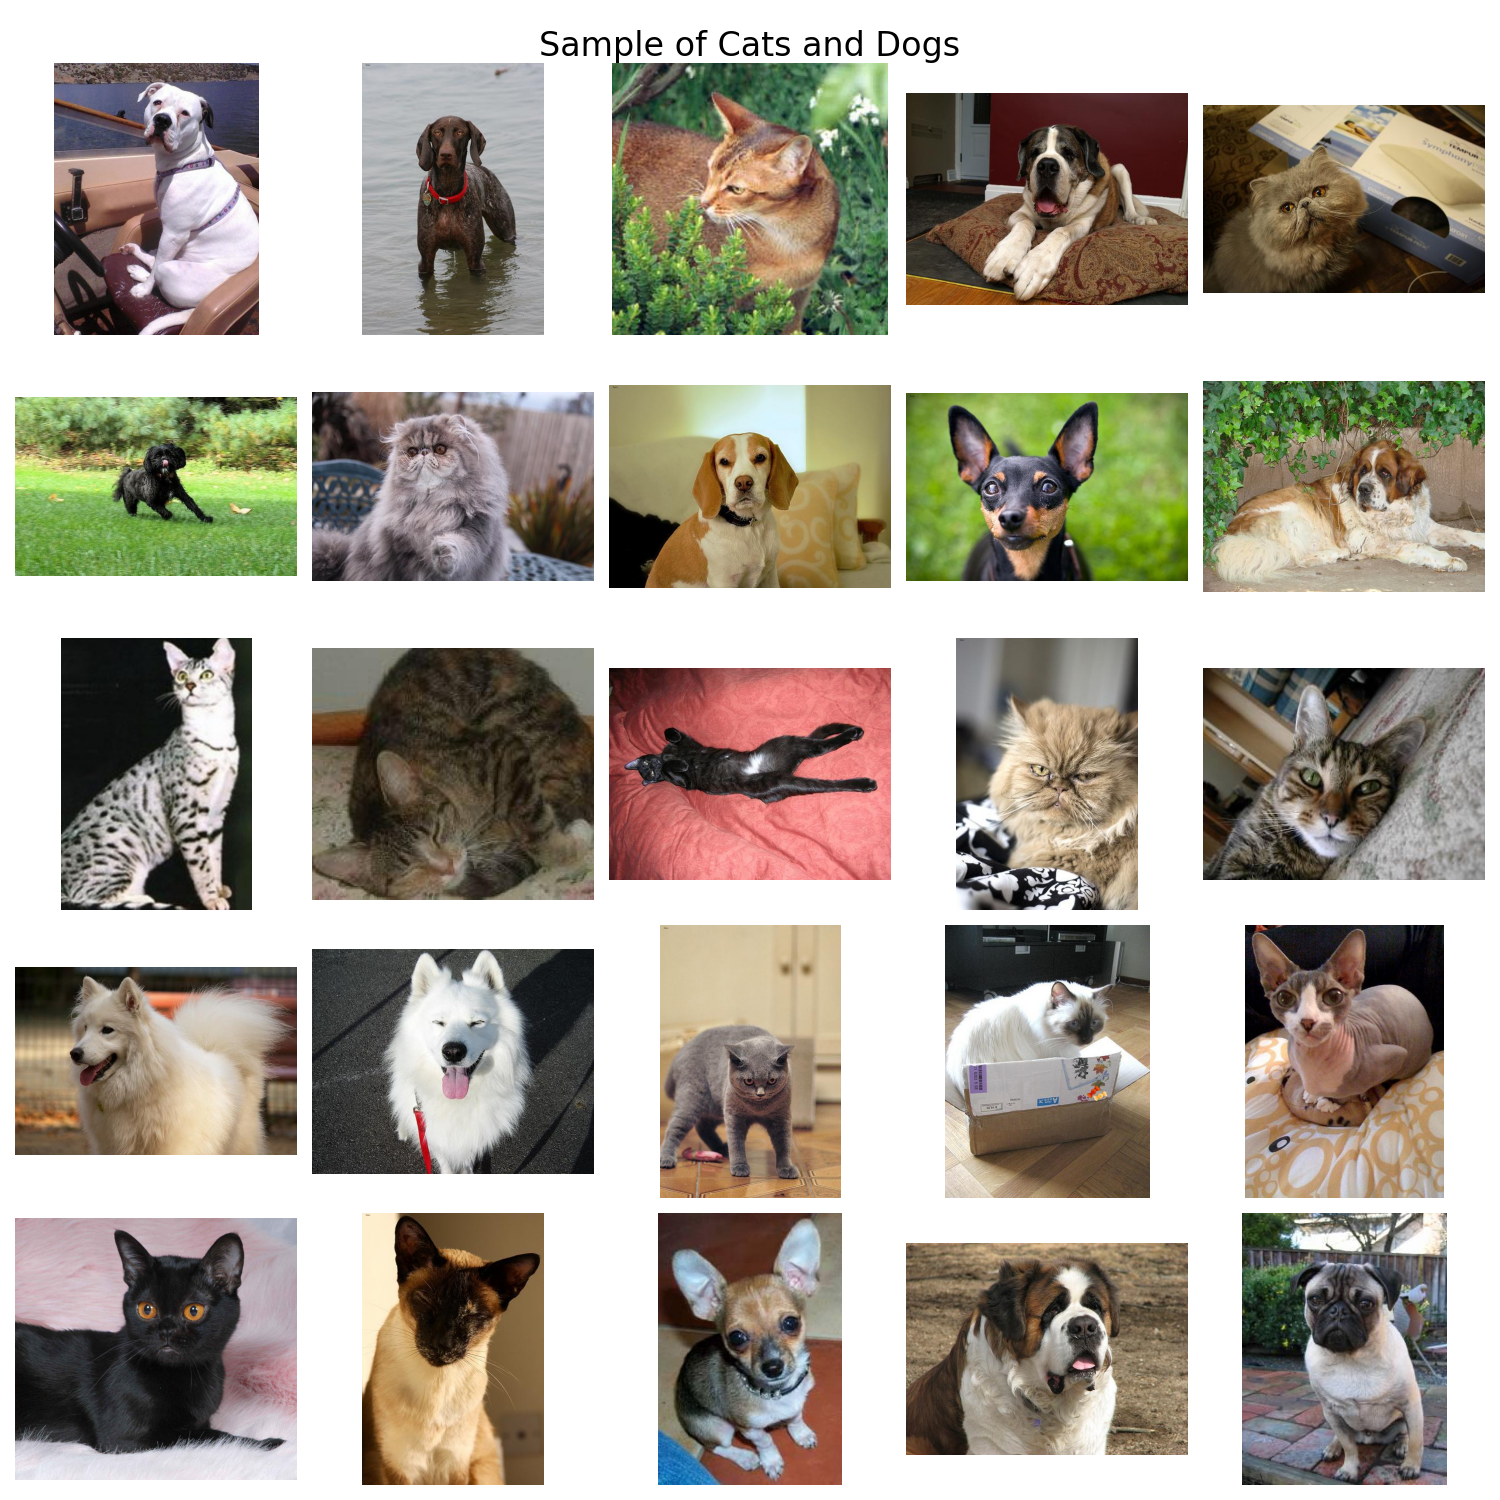

## We will use Resnet50 neural architecture


In [111]:
from tensorflow.keras import applications
img_height, img_width = 256, 256
base_model = applications.ResNet50(weights='imagenet', 
            include_top=False, input_shape=(img_height, img_width, 3))
len(base_model.layers)

175

In [22]:
base_model.summary()

Model: "resnet50"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_11 (InputLayer)   │ (None, 256, 256, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_pad (ZeroPadding2D)     │ (None, 262, 262, 3)       │               0 │ input_layer_11[0][0]       │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_conv (Conv2D)           │ (None, 128, 128, 64)      │           9,472 │ conv1_pad[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_bn (BatchNormalization) │ (None, 128, 128, 64)      │             256 │ conv1_conv[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_relu (Activation)       │ (None, 128, 128, 64)      │               0 │ conv1_bn[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ pool1_pad (ZeroPadding2D)     │ (None, 130, 130, 64)      │               0 │ conv1_relu[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ pool1_pool (MaxPooling2D)     │ (None, 64, 64, 64)        │               0 │ pool1_pad[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_conv (Conv2D)  │ (None, 64, 64, 64)        │           4,160 │ pool1_pool[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_bn             │ (None, 64, 64, 64)        │             256 │ conv2_block1_1_conv[0][0]  │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_relu           │ (None, 64, 64, 64)        │               0 │ conv2_block1_1_bn[0][0]    │
│ (Activation)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_conv (Conv2D)  │ (None, 64, 64, 64)        │          36,928 │ conv2_block1_1_relu[0][0]  │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_bn             │ (None, 64, 64, 64)        │             256 │ conv2_block1_2_conv[0][0]  │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_relu           │ (None, 64, 64, 64)        │               0 │ conv2_block1_2_bn[0][0]    │
│ (Activation)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_0_conv (Conv2D)  │ (None, 64, 64, 256)       │          16,640 │ pool1_pool[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_3_conv (Conv2D)  │ (None, 64, 64, 256)       │          16,640 │ conv2_block1_2_relu[0][0]  │
├───────────────────────────────┼───────────────────────────┼───────────────

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 23,534,592 (89.78 MB)

 Non-trainable params: 53,120 (207.50 KB)

In [1]:
# Implementation

import pandas as pd

# Load CSV files
basepath = 'C:/Users/shikh/Documents/classes/2024/mscbio2025/catsAndDogs/';
train_df = pd.read_csv(basepath+'train.csv')
val_df = pd.read_csv(basepath+'val.csv')

train_df['category'] = train_df['category'].astype(str)
val_df['category'] = val_df['category'].astype(str)

train_df['path'] = train_df['path'].apply(lambda x: basepath + x)
val_df['path'] = val_df['path'].apply(lambda x: basepath + x)

In [2]:
train_df

path category
0    C:/Users/shikh/Documents/classes/2024/mscbio20...        0
1    C:/Users/shikh/Documents/classes/2024/mscbio20...        0
2    C:/Users/shikh/Documents/classes/2024/mscbio20...        0
3    C:/Users/shikh/Documents/classes/2024/mscbio20...        0
4    C:/Users/shikh/Documents/classes/2024/mscbio20...        0
..                                                 ...      ...
270  C:/Users/shikh/Documents/classes/2024/mscbio20...        1
271  C:/Users/shikh/Documents/classes/2024/mscbio20...        1
272  C:/Users/shikh/Documents/classes/2024/mscbio20...        1
273  C:/Users/shikh/Documents/classes/2024/mscbio20...        1
274  C:/Users/shikh/Documents/classes/2024/mscbio20...        1

[275 rows x 2 columns]

In [3]:
val_df

path category
0   C:/Users/shikh/Documents/classes/2024/mscbio20...        0
1   C:/Users/shikh/Documents/classes/2024/mscbio20...        0
2   C:/Users/shikh/Documents/classes/2024/mscbio20...        0
3   C:/Users/shikh/Documents/classes/2024/mscbio20...        0
4   C:/Users/shikh/Documents/classes/2024/mscbio20...        0
..                                                ...      ...
65  C:/Users/shikh/Documents/classes/2024/mscbio20...        1
66  C:/Users/shikh/Documents/classes/2024/mscbio20...        1
67  C:/Users/shikh/Documents/classes/2024/mscbio20...        1
68  C:/Users/shikh/Documents/classes/2024/mscbio20...        1
69  C:/Users/shikh/Documents/classes/2024/mscbio20...        1

[70 rows x 2 columns]

In [5]:
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers, applications
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Image dimensions
img_height, img_width = 256, 256
batch_size = 16

In [97]:
# Data augmentation and preprocessing
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    zoom_range=0.2,
    shear_range=0.2,
    fill_mode='nearest',
    validation_split=0.2
)

In [98]:
val_datagen = ImageDataGenerator(rescale=1./255)

In [99]:
train_generator = train_datagen.flow_from_dataframe(
    dataframe=train_df,
    x_col='path',
    y_col='category',
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    shuffle=True,
    subset='training'
)

Found 220 validated image filenames belonging to 2 classes.


In [100]:
test_generator = train_datagen.flow_from_dataframe(
    dataframe = train_df,
    x_col='path',
    y_col='category',
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    shuffle=False,
    subset='validation'
)

Found 55 validated image filenames belonging to 2 classes.


In [101]:
validation_generator = val_datagen.flow_from_dataframe(
    dataframe=val_df,
    x_col='path',
    y_col='category',
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary'
)

Found 70 validated image filenames belonging to 2 classes.


In [113]:
# Build the model using transfer learning
base_model = applications.ResNet50(weights='imagenet',
                include_top=False, input_shape=(img_height, img_width, 3))

In [103]:
# Freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False

In [104]:
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(256, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(64, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(1, activation='sigmoid')
])

In [105]:
model.compile(optimizer=optimizers.Adam(learning_rate=1e-5),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [112]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='accuracy', 
                                    patience=10, mode='max', verbose=1)
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(factor=0.2, patience=3)

In [107]:
import warnings
warnings.filterwarnings("ignore")
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    validation_data=test_generator,
    validation_steps=test_generator.samples // batch_size,
    epochs=50,
    callbacks=[early_stopping, reduce_lr]
)

Epoch 1/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 24s 1s/step - accuracy: 0.6174 - loss: 0.7876 - val_accuracy: 0.9792 - val_loss: 0.6435 - learning_rate: 1.0000e-05
Epoch 2/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 212ms/step - accuracy: 0.6250 - loss: 0.8728 - val_accuracy: 0.9792 - val_loss: 0.6467 - learning_rate: 1.0000e-05
Epoch 3/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 12s 950ms/step - accuracy: 0.5574 - loss: 0.9241 - val_accuracy: 0.1875 - val_loss: 0.7045 - learning_rate: 1.0000e-05
Epoch 4/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 216ms/step - accuracy: 0.6250 - loss: 1.0713 - val_accuracy: 0.1875 - val_loss: 0.7064 - learning_rate: 1.0000e-05
Epoch 5/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 13s 1s/step - accuracy: 0.5535 - loss: 0.8122 - val_accuracy: 0.0000e+00 - val_loss: 0.7551 - learning_rate: 2.0000e-06
Epoch 6/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 209ms/step - accuracy: 0.3750 - loss: 1.1813 - val_accuracy: 0.0000e+00 - val_loss: 0.7601 - learning_rate: 2.0000e-06
Epoch 7/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 13s 1s/step - accurac

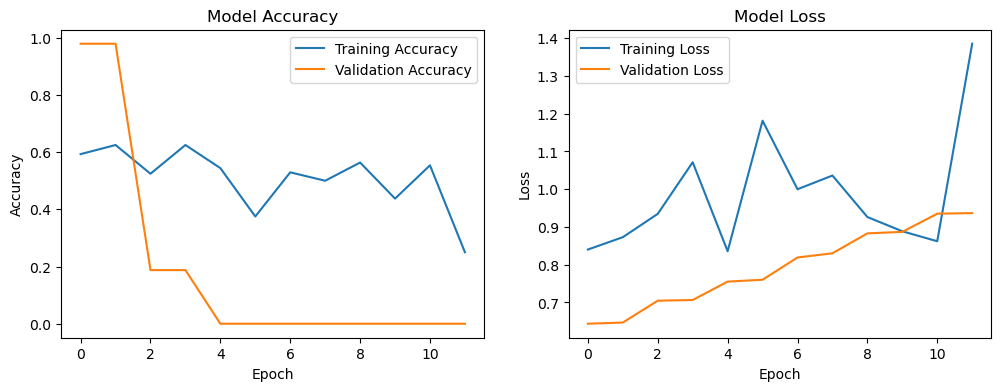

In [108]:
import matplotlib.pyplot as plt
import pandas as pd


# Visualize training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [114]:
test_loss, test_acc = model.evaluate(validation_generator, 
                    steps=validation_generator.samples // batch_size)
print(f'Test accuracy: {test_acc:.4f}')

4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 786ms/step - accuracy: 0.6187 - loss: 0.6586
Test accuracy: 0.6406
